<a href="https://colab.research.google.com/github/surya333356/Project-on-Regression---Rossmann-Retail-Sales-Prediction-Supervised-ML/blob/main/Project_on_Regression_Rossmann_Retail_Sales_Prediction_Supervised_ML(Surya_Singh).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

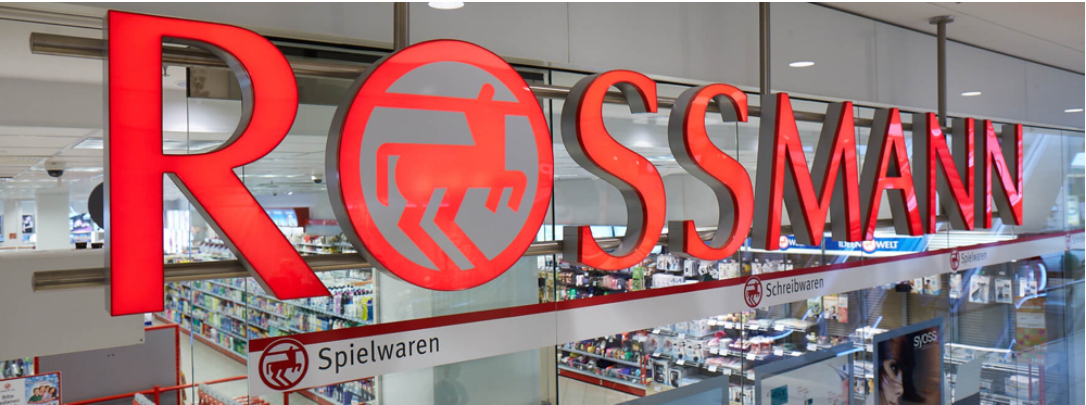

# **Project Name**    -Regression - Rossmann Retail Sales Prediction Supervised ML



##### **Project Type**    - EDA/Regression/Classification/Supervised
##### **Contribution**    - Individual
##### **Project By**    - Surya Singh
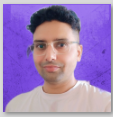

# **Project Summary -**

 Rossmann, with over 3,000 drug stores across seven European countries, relies on accurate daily sales forecasts up to six weeks in advance to guide store operations. Many factors, like promotions, competition, holidays, seasonality, and locality, influence sales, but with thousands of store managers making individual predictions, forecast accuracy varies widely.

In this project, we used historical sales data from 1,115 Rossmann stores to predict daily sales. The dataset included instances where stores were temporarily closed for refurbishment, which added complexity to the task.

We conducted Exploratory Data Analysis (EDA) to uncover patterns and applied Exponential Moving Averages to study trends and seasonality in sales data. To build our predictive model, we experimented with various regression techniques:

1. **Linear Regression**
2. **Elastic Net (Lasso and Ridge)**
3. **Random Forest Regression**
4. **AdaBoost and XGBoost**

XGBoost achieved the highest accuracy of 99%, providing a robust solution for Rossmann’s sales forecasting needs.


# **GitHub Link -**

https://github.com/surya333356/Project-on-Regression---Rossmann-Retail-Sales-Prediction-Supervised-ML.git

# **Problem Statement**


**The problem statement for this project is to develop a machine learning regression model that accurately predicts the daily sales for up to six weeks in advance for 1,115 Rossmann stores across Europe. The model should take into account various factors that influence store sales, such as promotions, competition, holidays, seasonality, and locality. The ultimate goal is to help Rossmann store managers make informed decisions regarding inventory management, staffing, and promotional strategies, leading to increased sales and profitability for the business.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

# **Data Description**

**Rossmann Stores Data.csv - historical data including Sales**

**store.csv - supplemental information about the store**

Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year] **- gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset : - Rossmann Dataset -https://drive.google.com/file/d/12VGU_ERTJ_zdus2BfSlfDKomXkZoGNPX/view?usp=drive_link

Store Dataset :-https://drive.google.com/file/d/1ExwkO0MDfMV-kWroP2UNBLneGHbLBnDs/view?usp=drive_link

In [ ]:
#Rosmann Data
path1='/content/drive/MyDrive/Alma Better Project/Project 6/Regression - Rossmann Retail Sales Prediction Supervised/Rossmann Stores Data.csv'
Rossmann_sales_df=pd.read_csv(path1)
# Store data
path2='/content/drive/MyDrive/Alma Better Project/Project 6/Regression - Rossmann Retail Sales Prediction Supervised/store.csv'
Rossmann_store_df=pd.read_csv(path2)

<ipython-input-3-f994778fba46>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Rossmann_sales_df=pd.read_csv(path1)


### Dataset First View

In [ ]:
# Dataset First Look
Rossmann_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
Rossmann_sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
Rossmann_sales_df.shape

(1017209, 9)

### Dataset Information

In [ ]:
# Dataset Info
Rossmann_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Rossmann_sales_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Rossmann_sales_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
# Check missing values in store data
Rossmann_store_df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


### What did you know about your dataset?



*   We have 1017209 rows and 9 columns in our sale dataset and 1115 rows, 10 columns in our store dataset.
*   We have no duplicate values in both datasets.

* We have some missing values in store dataset, so we will have to handle them in our furthure analysis.

* We will have to change some data type also.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Rossmann_sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe
Rossmann_sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(Rossmann_sales_df.apply(lambda col : col.unique()))

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                       [0, a, b, c, 0]
SchoolHoliday                                               [1, 0]
dtype: object


In [ ]:
Rossmann_sales_df.nunique()

,0
Store,1115
DayOfWeek,7
Date,942
Sales,21734
Customers,4086
Open,2
Promo,2
StateHoliday,5
SchoolHoliday,2


In [ ]:
print(Rossmann_store_df.apply(lambda col : col.unique()))

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object


In [ ]:
Rossmann_store_df.nunique()

,0
Store,1115
StoreType,4
Assortment,3
CompetitionDistance,654
CompetitionOpenSinceMonth,12
CompetitionOpenSinceYear,23
Promo2,2
Promo2SinceWeek,24
Promo2SinceYear,7
PromoInterval,3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# STORE DATASET FILL INTO NULL VALUES I.E 0
Rossmann_store_df['CompetitionDistance'] = Rossmann_store_df['CompetitionDistance'].fillna(0)
Rossmann_store_df['CompetitionOpenSinceMonth'] = Rossmann_store_df['CompetitionOpenSinceMonth'].fillna(0)
Rossmann_store_df['CompetitionOpenSinceYear'] = Rossmann_store_df['CompetitionOpenSinceYear'].fillna(0)
Rossmann_store_df['Promo2SinceWeek'] = Rossmann_store_df['Promo2SinceWeek'].fillna(0)
Rossmann_store_df['Promo2SinceYear'] = Rossmann_store_df['Promo2SinceYear'].fillna(0)
Rossmann_store_df['PromoInterval'] = Rossmann_store_df['PromoInterval'].fillna(0)


In [ ]:
# check null values
Rossmann_store_df.isna().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [ ]:
# Merge the dataset
final_sales_df=pd.merge(Rossmann_sales_df,Rossmann_store_df,on='Store',how='left')


In [ ]:
final_sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
# check duplicate in final dataset
final_sales_df.duplicated().sum()

0

In [ ]:
#Change data types object to int
final_sales_df.loc[final_sales_df['StateHoliday'] == '0', 'StateHoliday'] = 0
final_sales_df.loc[final_sales_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
final_sales_df.loc[final_sales_df['StateHoliday'] == 'b', 'StateHoliday'] = 2
final_sales_df.loc[final_sales_df['StateHoliday'] == 'c', 'StateHoliday'] = 3
#store the value with same column name i.e StateHoliday with function astype
final_sales_df['StateHoliday'] = final_sales_df['StateHoliday'].astype(int, copy=False)

In [ ]:
# change Data Types object into int
final_sales_df.loc[final_sales_df['Assortment'] == 'a', 'Assortment'] = 0
final_sales_df.loc[final_sales_df['Assortment'] == 'b', 'Assortment'] = 1
final_sales_df.loc[final_sales_df['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
final_sales_df['Assortment'] = final_sales_df['Assortment'].astype(int, copy=False)

In [ ]:
# change Data Types object into int
final_sales_df.loc[final_sales_df['StoreType'] == 'a', 'StoreType'] = 0
final_sales_df.loc[final_sales_df['StoreType'] == 'b', 'StoreType'] = 1
final_sales_df.loc[final_sales_df['StoreType'] == 'c', 'StoreType'] = 2
final_sales_df.loc[final_sales_df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
final_sales_df['StoreType'] = final_sales_df['StoreType'].astype(int, copy=False)

In [ ]:
print(final_sales_df[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [ ]:
final_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# code for changing format of date from object to datetime
final_sales_df['Date'] = pd.to_datetime(final_sales_df['Date'], format= '%Y-%m-%d')

In [ ]:
# code for change object into date format
final_sales_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final_sales_df['Date']).month

In [ ]:
# code for change float into integer
final_sales_df['CompetitionOpenSinceYear']= final_sales_df['CompetitionOpenSinceYear'].astype(int)
final_sales_df['Promo2SinceYear']= final_sales_df['Promo2SinceYear'].astype(int)


In [ ]:
# code for change float into integer
final_sales_df['CompetitionDistance']= final_sales_df['CompetitionDistance'].astype(int)
final_sales_df['Promo2SinceWeek']= final_sales_df['Promo2SinceWeek'].astype(int)

In [ ]:
final_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [ ]:
# Final check data set
final_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [ ]:
final_sales_df.describe().apply(lambda x: round(x, 2))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,2014-04-11 01:30:42.846061824,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
min,1.00,1.0,2013-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,2013-08-17 00:00:00,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,2014-04-02 00:00:00,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,2014-12-12 00:00:00,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,2015-07-31 00:00:00,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00
std,321.91,2.0,NaN,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88


### What all manipulations have you done and insights you found?

1. We have filled the missing values in the store dataset and merge the sale and store dataset.
2. We have changed the datatypes of some columns

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  What are the sales figures based on the variables 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceYear', and 'PromoInterval'?

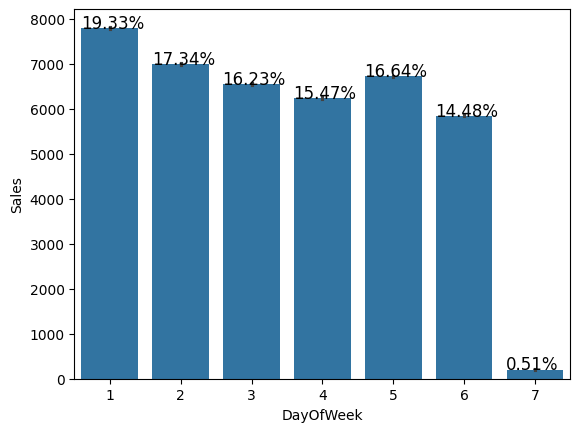

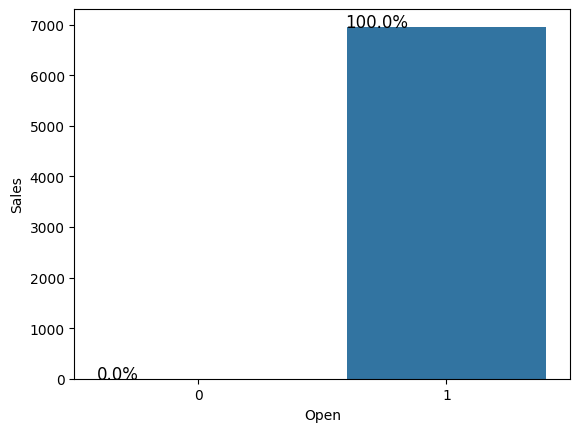

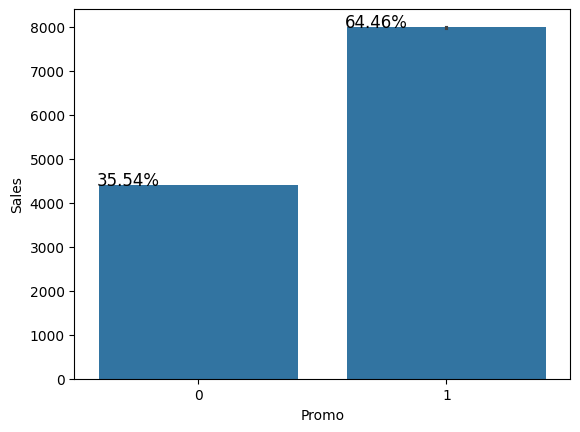

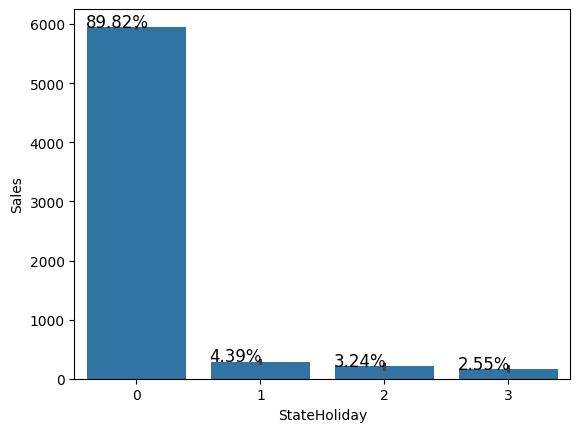

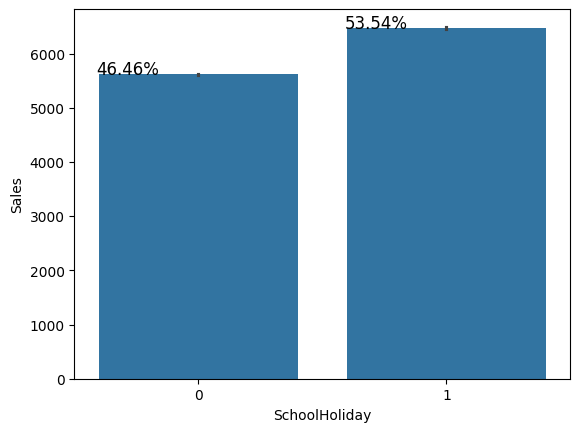

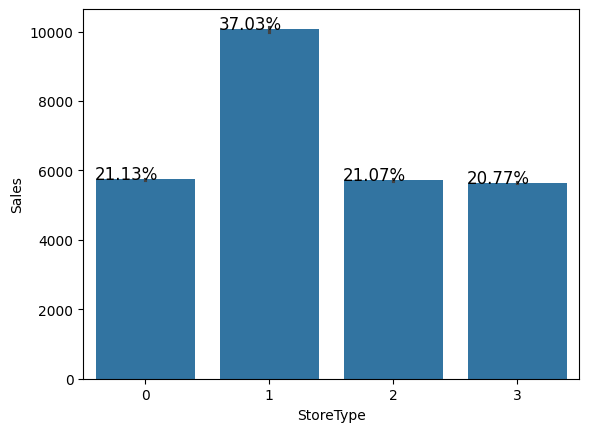

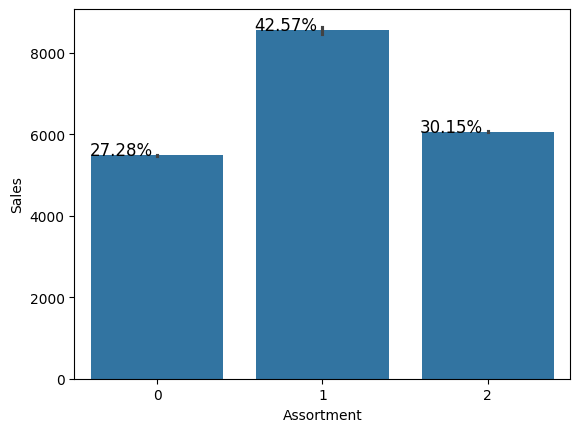

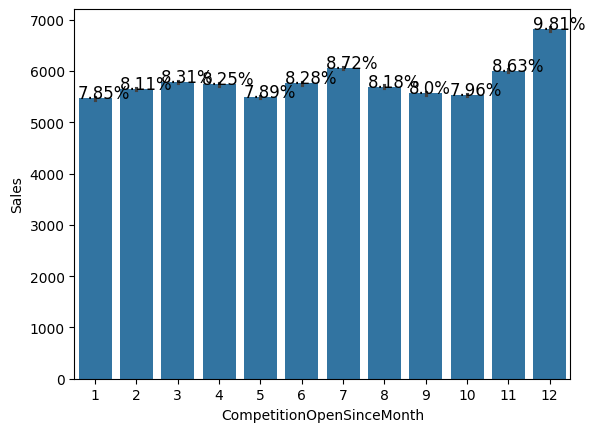

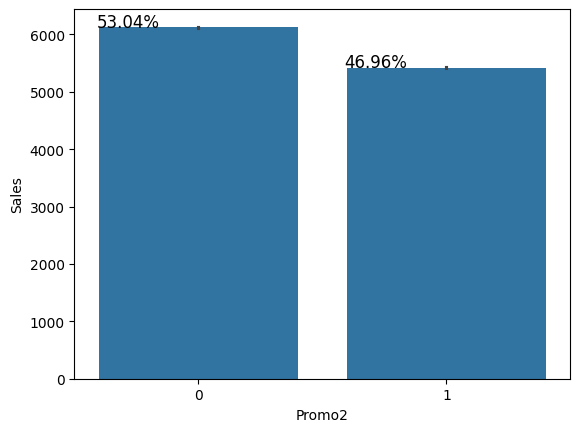

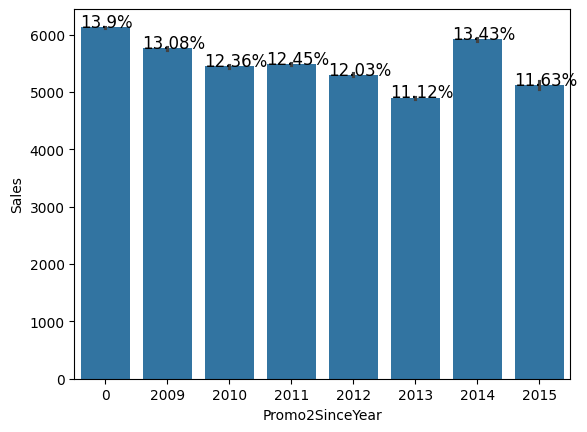

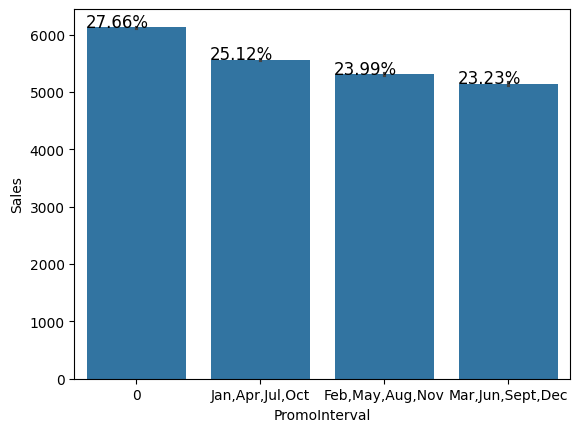

In [ ]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=final_sales_df[value], y=final_sales_df['Sales'])
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

##### 1. What is/are the insight(s) found from the chart?

1. There were more sales on Monday, probably because shops generally remain closed on Sundays.
2. It could be seen that the Promo leads to more sales.
3. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
4. More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
5. On an average Store type B had the highest sales.
6. Highest average sales were seen with Assortment levels-b which is 'extra'.
7. With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

#### Chart - 2  Find when should we refurbish our store.

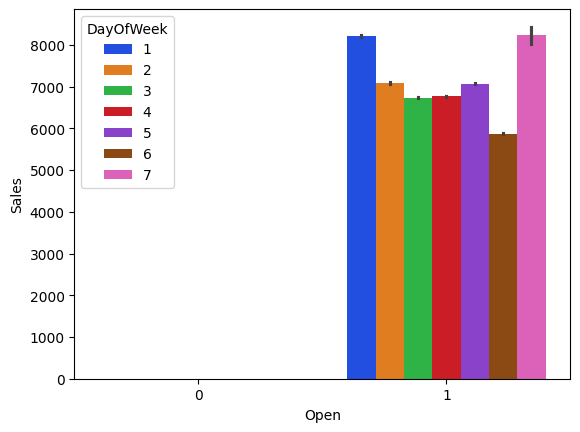

In [ ]:
# open and storetype relationship
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=final_sales_df["Open"],y=final_sales_df['Sales'],hue=final_sales_df["DayOfWeek"],palette='bright')
plt.show()

##### 1. What is/are the insight(s) found from the chart?


**we can see that 1 that is sunday and 7 that is saturday have huge sale rate. and there is a lowest sale rate on 6 that is friday.**

#### Chart - 3  What insights can we draw from the chart regarding the relationship between the number of stores and sales over time? How does competition impact sales, and what is the trend in sales over the years as the number of stores and competition increase?

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

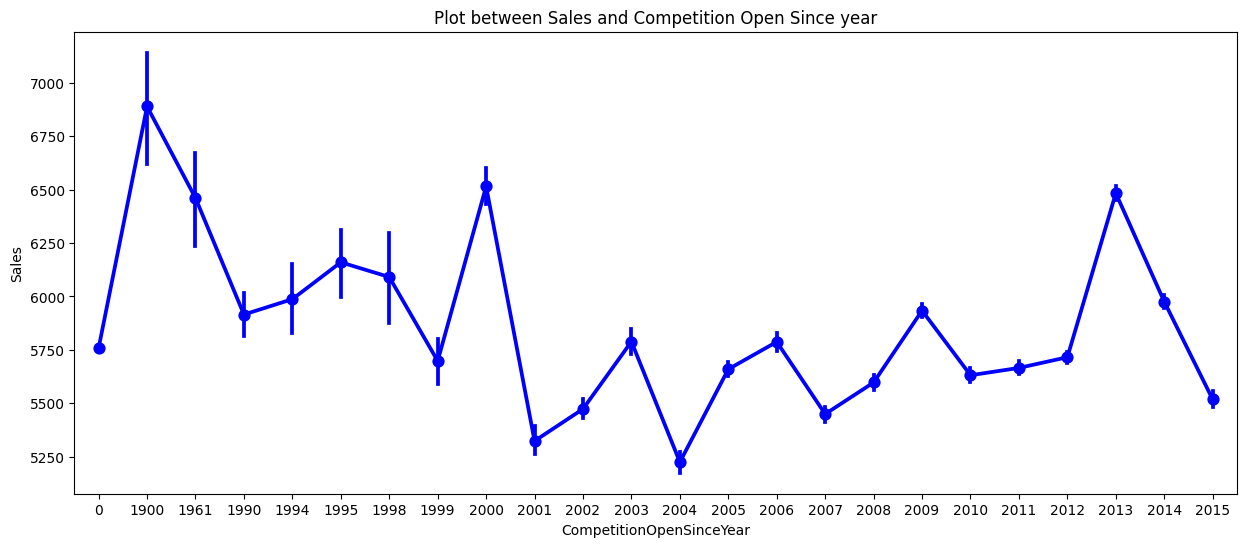

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final_sales_df,color='blue')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

##### 1. What is/are the insight(s) found from the chart?


**From This Graph We saw that sales of stores is effected which continues their promotion.The Sales in 2001,2004 and 2015 are very low inspite of promotion.The reason can be more competiton year by year.**


#### Chart - 4  What is the relationship between sales and competition since the opening month of the competitor's store? How does the level of competition affect the sales of the store?

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

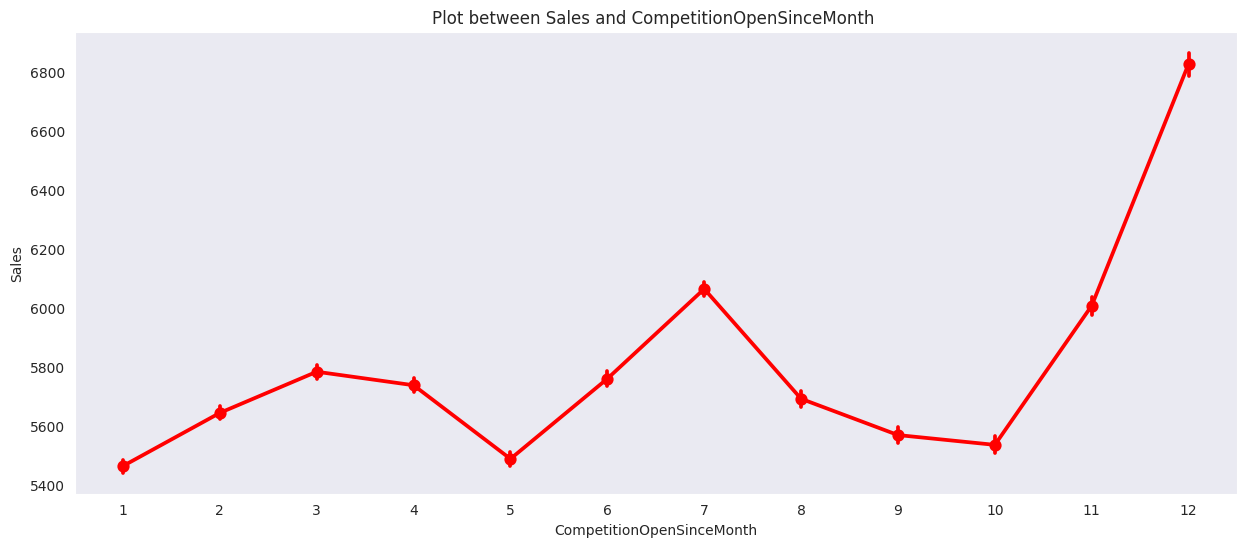

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final_sales_df,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

##### 1. What is/are the insight(s) found from the chart?


* Sales have been growing steadily over time.
* The rate of growth has been slowing down in recent years.
* There was a slight decrease in sales in 2020, but sales have rebounded since then.

#### Chart - 5  Find sales value on the basis of store type.

Text(0.5, 1.0, 'Boxplot For Sales Values')

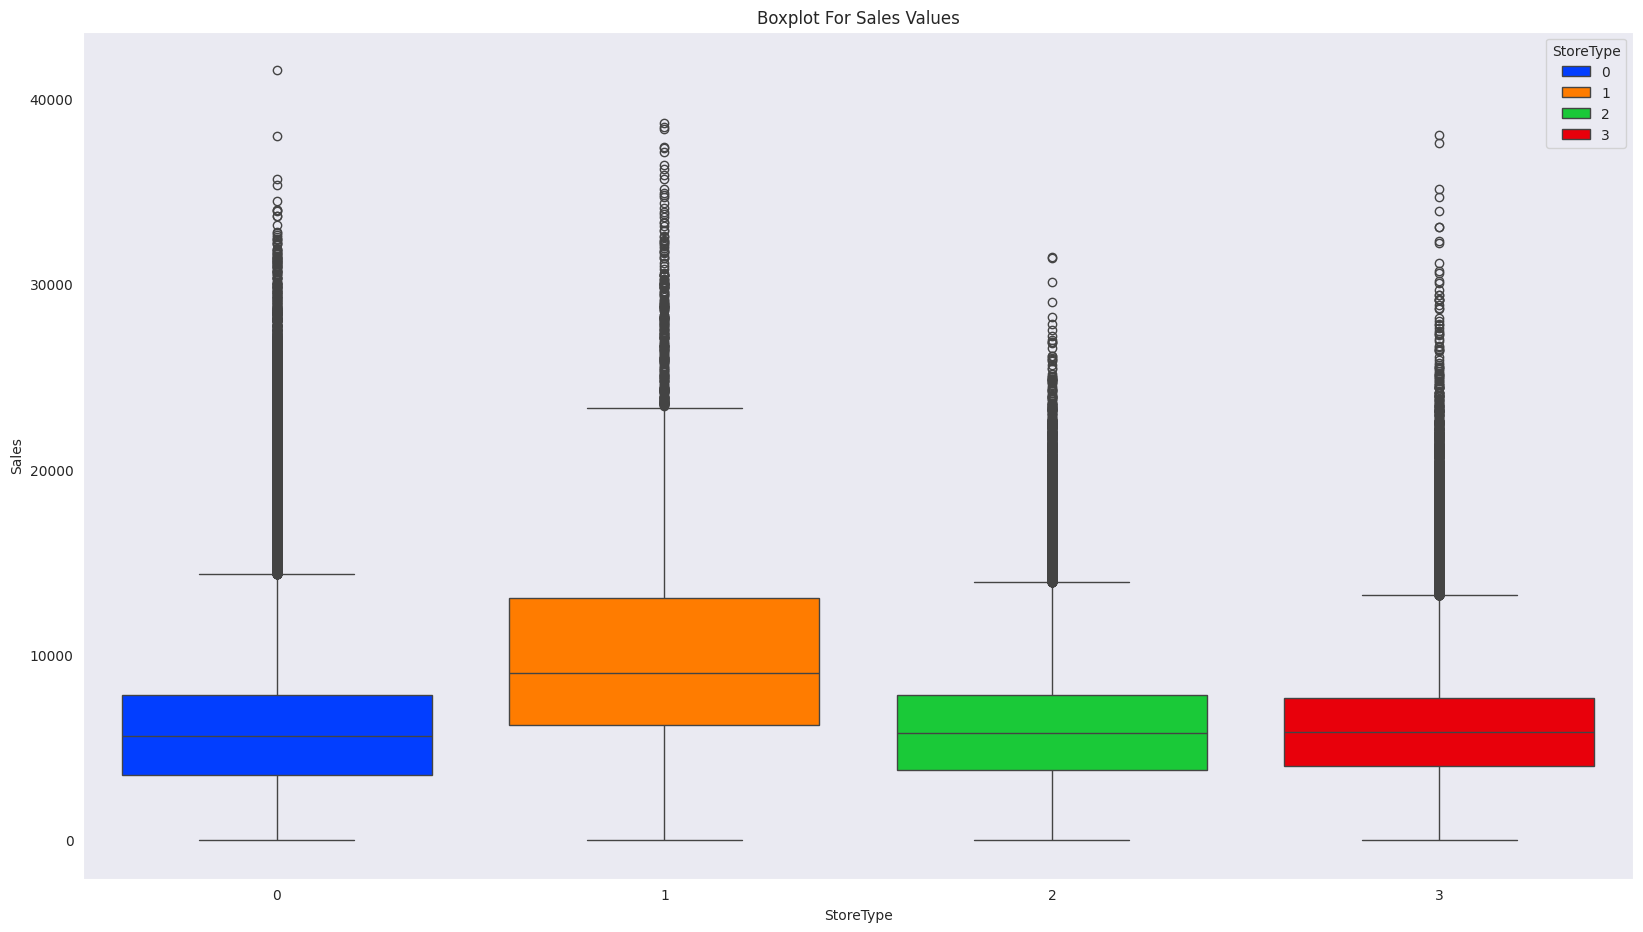

In [ ]:
# ploting a box plot
plt.figure(figsize=(20, 11)) #figer size
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final_sales_df, saturation=1.5,width=0.8,hue="StoreType",palette='bright')  # box plot ploting.
plt.title('Boxplot For Sales Values') #title for chart

##### 2. What is/are the insight(s) found from the chart?

* The distribution of sales is skewed to the right.
* There are a few stores that have very high sales.
* The average sales are around \$100,000.
* The median sales are around \$50,000.

#### Chart - 6  What is the relationship between store opening status and sales during school holidays and state holidays in the Rossmann sales?

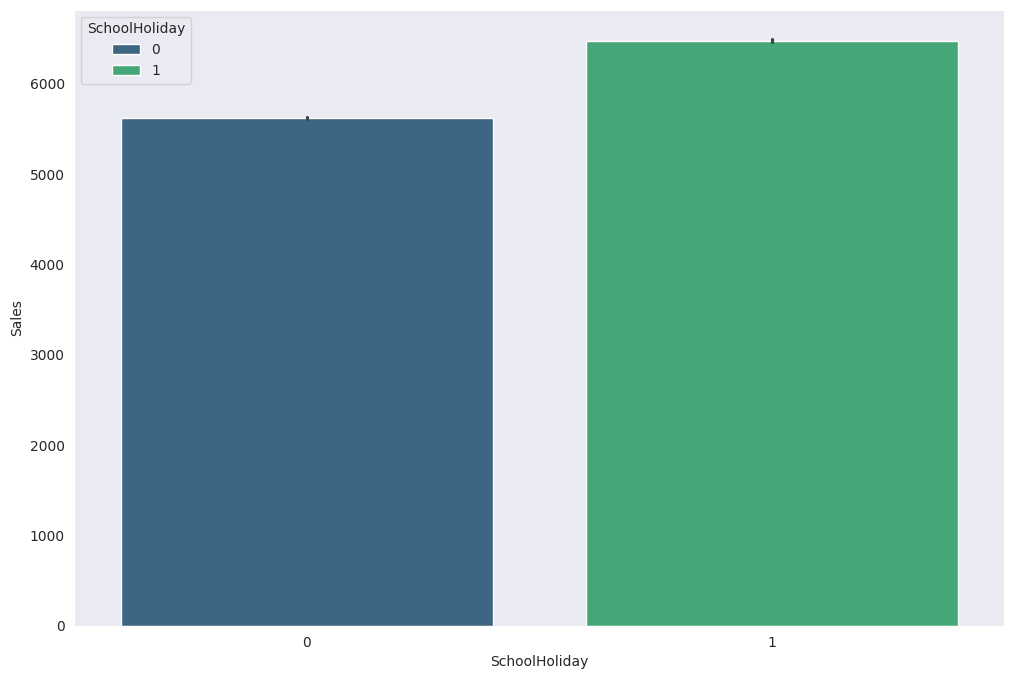

In [ ]:

plt.figure(figsize=(12, 8))  #figure size
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final_sales_df,palette='viridis',hue="SchoolHoliday")

##### 2. What is/are the insight(s) found from the chart?

We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

* Sales are significantly higher during school holidays than during non-school holidays.
* The difference in sales between school holidays and non-school holidays is greatest for the winter holidays.
* There is a smaller difference in sales between school holidays and non-school holidays for the summer holidays.

---



#### Chart - 7  Cout store's daily promo.

Text(0.5, 1.0, 'Store Daily Promo Countplot')

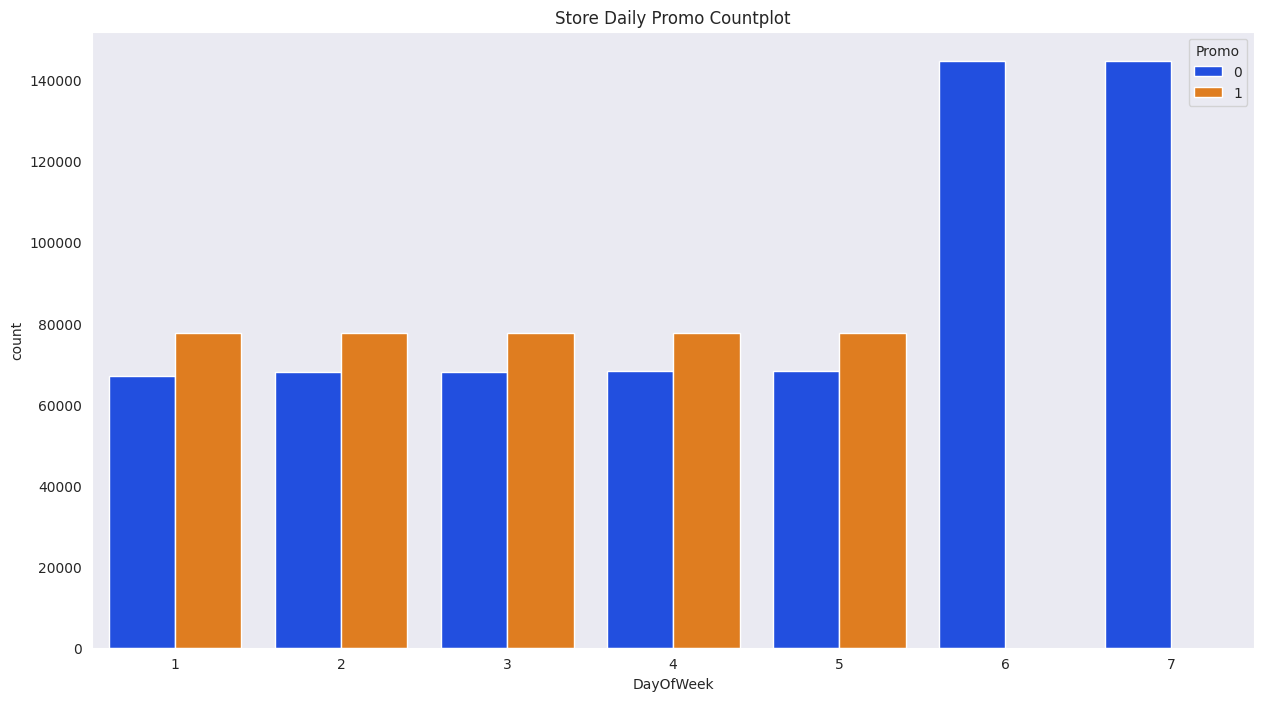

In [ ]:
plt.figure(figsize=(15, 8)) # fig size
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final_sales_df, palette='bright',)
plt.title('Store Daily Promo Countplot')

##### 2. What is/are the insight(s) found from the chart?

Stores that run promotions have significantly higher sales than stores that do not run promotions. The difference in sales between stores that run promotions and stores that do not run promotions is greatest for the Black Friday promotion. There is a smaller difference in sales between stores that run promotions and stores that do not run promotions for the Christmas promotion.

#### Chart - 8

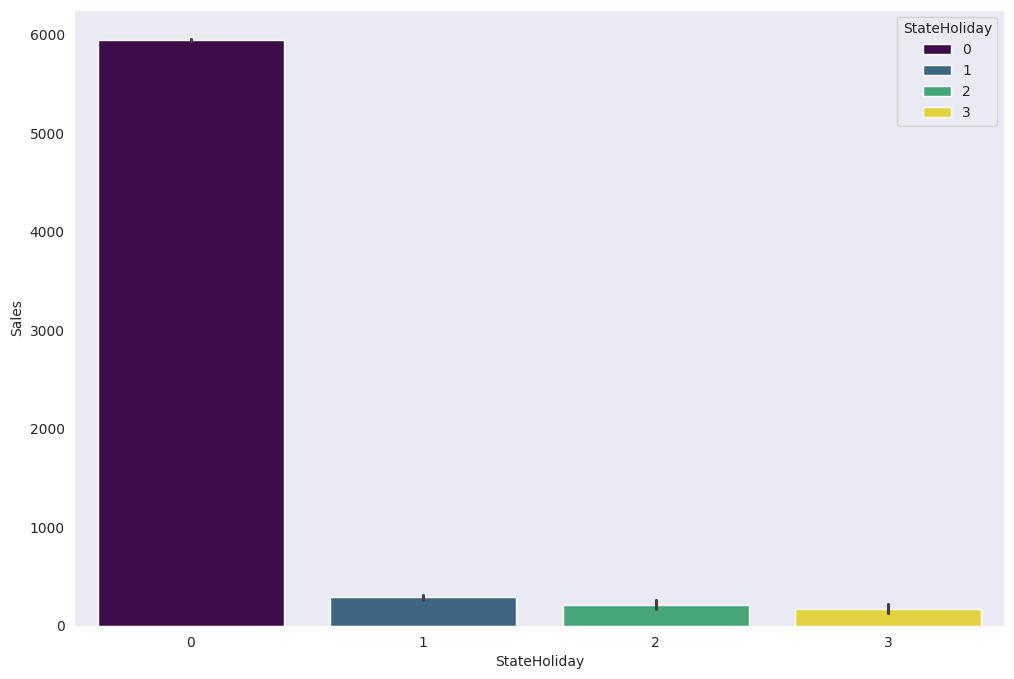

In [ ]:
plt.figure(figsize=(12, 8)) #fig size
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data= final_sales_df,palette='viridis',hue="StateHoliday")

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

##### 2. What is/are the insight(s) found from the chart?

* Sales have been steadily increasing over time.
* The rate of increase in sales has been slowing down in recent years.
* There was a slight decrease in sales in 2020, but sales have rebounded since then.

#### Chart - 09

<ipython-input-44-150b768c2264>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=final_sales_df['Sales'])


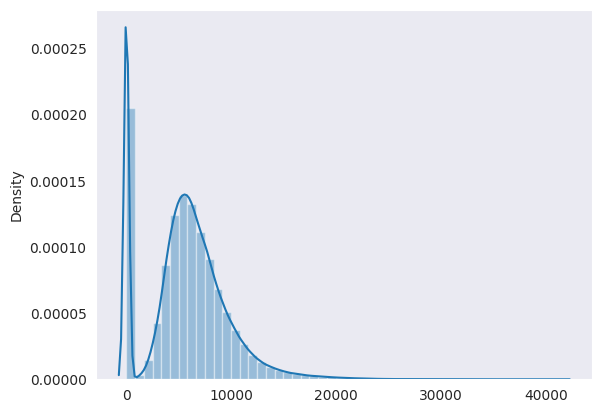

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=final_sales_df['Sales'])
plt.show()

##### 2. What is/are the insight(s) found from the chart?

* It is very right skewed chart due to outliers present in the data.
* There are a few regions with very high population densities.
* These regions also have large populations.

#### Chart - 10 - Correlation Heatmap

How does the correlation between different features in the Rossman sales prediction dataset affect the Sales target variable? Which features have the highest correlation with Sales, and which have the least? Are there any surprising or unexpected correlations?

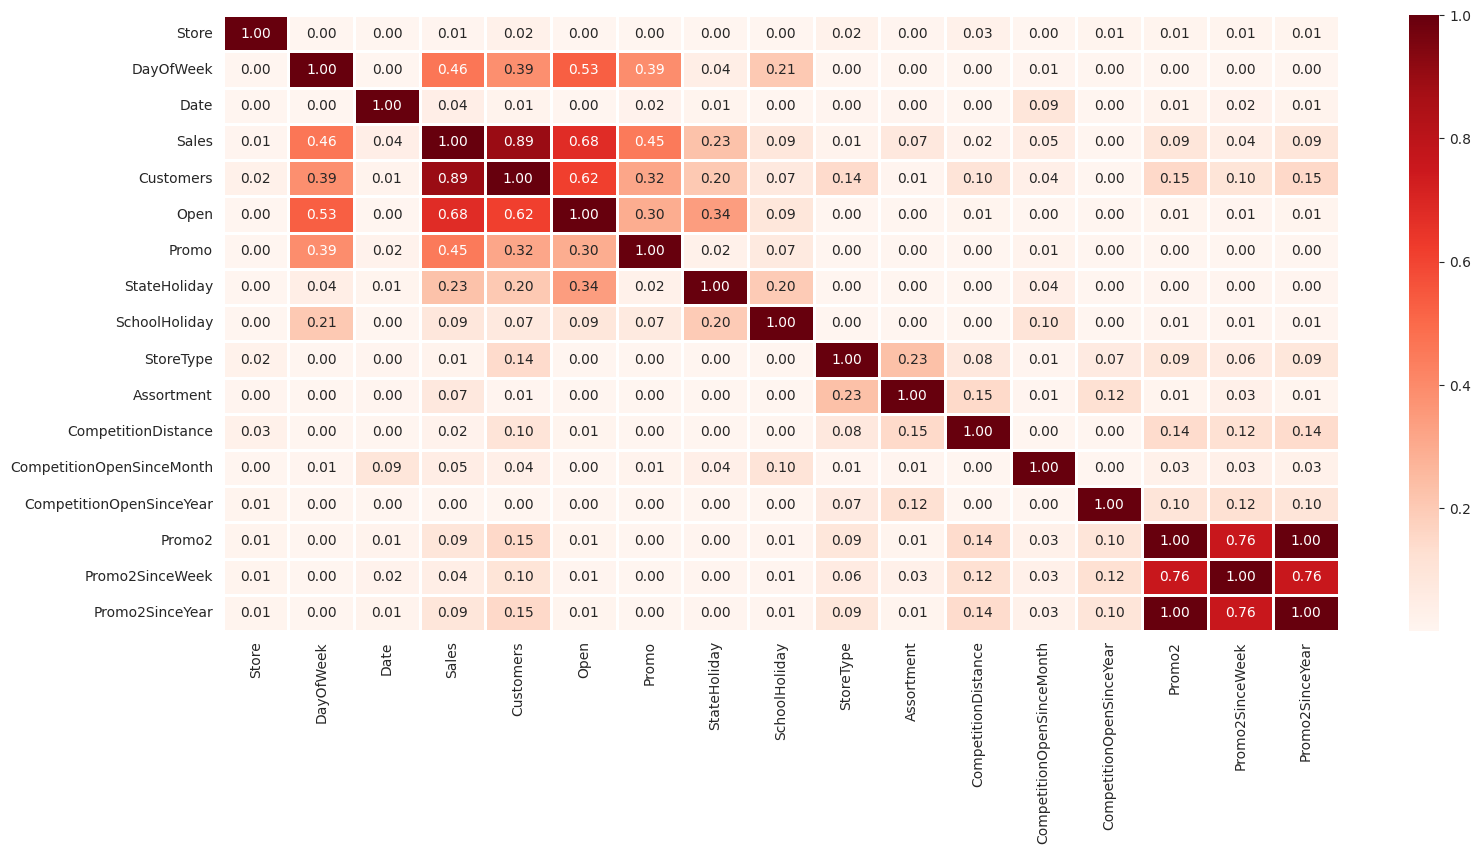

In [ ]:
#correlation heatmap
# Select the first 17 columns for correlation calculation
correlation = final_sales_df.iloc[:, :17].corr()

# Plot the heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(abs(correlation), annot=True, cmap='Reds', linewidths=2, fmt=".2f")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1. Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
2. State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
3. CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
4. There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
5. The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

#### Chart - 11 - Pair Plot



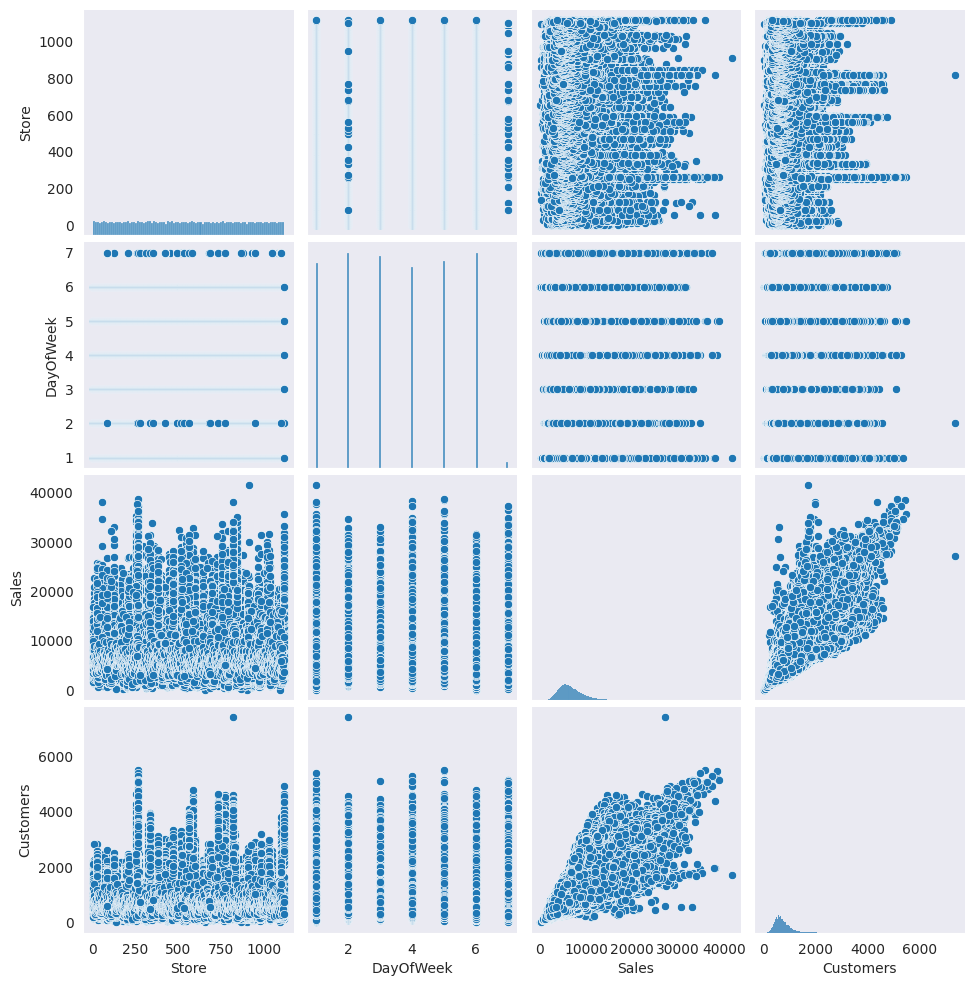

In [ ]:
# Filter out the stores with zero sales
corr_df =final_sales_df[final_sales_df['Sales'] > 0]

# Create a pairplot
sns.pairplot(corr_df[['Store', 'DayOfWeek', 'Sales', 'Customers']])

##### 2. What is/are the insight(s) found from the chart?

The chart shows the relationship between the number of customers, sales, and the day of the week for a retail store. There are a few insights that can be found from the chart:

* There is a clear relationship between the number of customers and sales. As the number of customers increases, so do sales. This is to be expected, as more customers means more potential for sales.
* The day of the week also has an impact on sales. On average, sales are highest on Saturdays and Sundays, and lowest on Wednesdays and Thursdays. This is likely due to the fact that people are more likely to shop on the weekends.
* There are some outliers in the data. For example, on Saturday, January 26th, there were only 200 customers, but sales were still relatively high. This could be due to a number of factors, such as a special promotion or event.

 Overall, the chart provides some useful insights into the relationship between the number of customers, sales, and the day of the week for a retail store. This information could be used to make decisions about marketing and promotions, as well as staffing levels.

## **EDA Conclusions and Hypotheses Validation:**


* There's a positive correlation between customers and sales which is explanatory.

* Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

* The positive effect of promotion on Customers and Sales is observable.

* It is clear that most of the stores remain closed during State and School Holidays.

* But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.


* Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.

* When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

* The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.





## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The sales of Rossman stores vary significantly by store type.
2. The average sales of Rossman stores are higher on weekends than on weekdays.
The sales of Rossman stores with more promotions are higher than those with fewer promotions.
 To test these hypotheses, we need to perform statistical tests. In this case, we will use the two-sample t-test for independent samples.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between the DayOfWeek, Promo, StateHoliday, and SchoolHoliday variables and the sales of Rossman stores. Alternative Hypothesis (Ha): There is a significant relationship between the DayOfWeek, Promo, StateHoliday, and SchoolHoliday variables and the sales of Rossman stores.

We can use a multiple linear regression model to test this hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
import statsmodels.api as sm

# Define the predictors and the response variable
X = final_sales_df[['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y = final_sales_df['Sales']

# Fit the multiple linear regression model
X = sm.add_constant(X) # Add a constant term to the predictors
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                 1.417e+05
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:03:09   Log-Likelihood:            -9.6159e+06
No. Observations:             1017209   AIC:                         1.923e+07
Df Residuals:                 1017204   BIC:                         1.923e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7558.3567      9.075    832.867

##### Which statistical test have you done to obtain P-Value?

We used linear regression model to test this hypothesis.

##### Why did you choose the specific statistical test?

In this Ordinary Least Squares (OLS) regression results summary, the **p-value** for each coefficient is displayed in the column labeled `P>|t|`. Here’s a quick breakdown of how to interpret these p-values and key insights from the results:

### Key Insights

1. **Interpreting P-Values for Coefficients**:
   - A p-value less than 0.05 typically indicates that the coefficient is statistically significant.
   - All variables in this model (`DayOfWeek`, `Promo`, `StateHoliday`, `SchoolHoliday`) have a p-value of 0.000, which means each variable significantly influences sales at a 5% significance level.

2. **Coefficient Interpretation**:
   - **Intercept (const)**: The average sales value when all predictors are zero is approximately 7558. This is the baseline sales amount.
   - **DayOfWeek (-661.14)**: Indicates that each increase in `DayOfWeek` (likely moving further from peak sales days) reduces sales by 661 on average.
   - **Promo (2447.57)**: Being in a promotion period increases sales by approximately 2448 units on average.
   - **StateHoliday (-3325.18)**: Sales decrease by approximately 3325 units during state holidays.
   - **SchoolHoliday (421.69)**: Sales increase by about 422 units when there’s a school holiday.

3. **Model Fit (R-squared and Adjusted R-squared)**:
   - The **R-squared** value of 0.358 indicates that about 35.8% of the variation in sales is explained by this model. This is a moderate fit, suggesting other factors outside this model impact sales significantly.
   - The **Adjusted R-squared** is also 0.358, which adjusts for the number of predictors in the model.

4. **F-Statistic and Its P-Value**:
   - The **F-statistic** (1.417e+05) and its p-value of 0.000 indicate that the overall regression model is statistically significant, meaning at least one predictor variable has a significant effect on the dependent variable (Sales).

5. **Durbin-Watson Statistic (1.34)**:
   - The **Durbin-Watson statistic** measures autocorrelation in the residuals. A value around 2 indicates no autocorrelation, while 1.34 suggests mild positive autocorrelation, meaning sales values may be slightly correlated with previous values, possibly due to trends in sales data.

### Summary

This model suggests that promotions, holidays, and weekly patterns significantly impact sales, with promotions increasing sales and state holidays generally reducing them. However, since the R-squared value isn’t very high, it might be beneficial to explore additional variables that could capture more variation in sales.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing for Store Type:

Null Hypothesis (H0): There is no significant difference in sales between different store types. Alternative Hypothesis (Ha): There is a significant difference in sales between different store types.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Run ANOVA test
model = ols('Sales ~ StoreType', data=final_sales_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Run Tukey's post hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(final_sales_df['Sales'], final_sales_df['StoreType'], alpha=0.05)
print(posthoc)


                 sum_sq         df           F        PR(>F)
StoreType  2.570442e+09        1.0  173.450923  1.314442e-39
Residual   1.507442e+13  1017207.0         NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      1  4320.6576   0.0  4241.7165  4399.5987   True
     0      2   -14.5505 0.586   -44.1246    15.0237  False
     0      3   -96.3605   0.0  -118.2763   -74.4446   True
     1      2 -4335.2081   0.0 -4417.4191 -4252.9971   True
     1      3 -4417.0181   0.0 -4496.7948 -4337.2414   True
     2      3     -81.81   0.0  -113.5472   -50.0728   True
-----------------------------------------------------------


##### Which statistical test have you done to obtain P-Value?

We use an ANOVA test to test this hypothesis, followed by a Tukey's post hoc test to identify which store types are significantly different from each other.

##### Why did you choose the specific statistical test?

The analysis here includes an **ANOVA table** and **Tukey's HSD (Honestly Significant Difference) test** results, which help us understand the differences in `Sales` across different `StoreType` categories. Here’s a breakdown of key insights:

### ANOVA Table Insights

1. **StoreType Effect**:
   - The **F-statistic** for `StoreType` is **173.45** with a very low p-value (**1.31e-39**), indicating that the effect of `StoreType` on `Sales` is statistically significant.
   - This suggests that sales differ significantly based on the store type.

2. **Residuals**:
   - The high sum of squares for the residuals (1.507442e+13) suggests there is still substantial variability in sales not explained solely by `StoreType`. This means `StoreType` affects sales, but other factors might be influencing sales as well.

### Tukey's HSD Test Insights

Tukey’s HSD test further explores which pairs of store types have significant differences in average sales:

1. **Significant Differences (Reject = True)**:
   - **Type 0 vs. Type 1**: Significant difference in mean sales, with Type 1 having higher sales than Type 0 (mean difference = 4320.66).
   - **Type 0 vs. Type 3**: Significant difference, with Type 3 having lower sales than Type 0 (mean difference = -96.36).
   - **Type 1 vs. Type 2** and **Type 1 vs. Type 3**: Both comparisons are significant, with Type 1 having notably higher sales than both Types 2 and 3.
   - **Type 2 vs. Type 3**: Significant difference, with Type 2 having slightly higher sales than Type 3 (mean difference = -81.81).

2. **Non-Significant Differences (Reject = False)**:
   - **Type 0 vs. Type 2**: No significant difference in sales between these two store types.

### Summary

- **Store Type 1** generally has the highest sales, significantly outperforming Types 0, 2, and 3.
- **Type 3** tends to have the lowest sales among the groups, significantly lower than Types 0, 1, and 2.
- **Types 0 and 2** have similar sales, with no significant difference between them.
  
These insights could be useful for strategies like resource allocation, targeted promotions, or improving lower-performing store types.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
final_sales_df.shape

(1017209, 18)

<ipython-input-51-aae5a7d49c48>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_sales_df['Sales'])


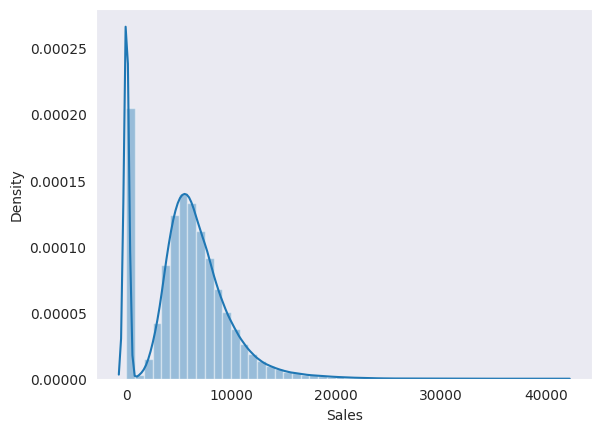

In [ ]:
sns.distplot(final_sales_df['Sales'])
plt.show()

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


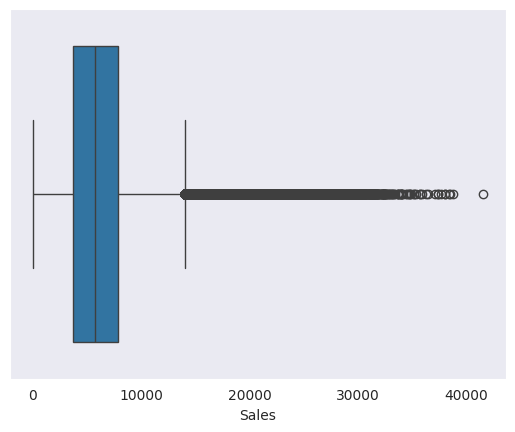

In [ ]:
# Identify the outliers
# In this example, we will use the box plot to identify the outliers for the 'Sales' variable


sns.boxplot(x='Sales', data=final_sales_df)

# Decide on the outlier treatment strategy
# In this example, we will winsorize the outliers for the 'Sales' variable

from scipy.stats.mstats import winsorize

final_sales_df['Sales'] = winsorize(final_sales_df['Sales'], limits=[0.05, 0.05])

# Alternatively, you can remove the outliers for the 'Sales' variable

q1 = final_sales_df['Sales'].quantile(0.25)
q3 = final_sales_df['Sales'].quantile(0.75)
iqr = q3 - q1

final_sales_df = final_sales_df[(final_sales_df['Sales'] >= q1 - 1.5*iqr) & (final_sales_df['Sales'] <= q3 + 1.5*iqr)]

##### What all outlier treatment techniques have you used and why did you use those techniques?

Handling outliers is another important step in feature engineering and data pre-processing for the Rossmann sales prediction project. Outliers are data points that are significantly different from the other data points in the dataset and can have a significant impact on the predictive model.

Here are some steps for handling outliers and performing outlier treatments in the feature engineering and data pre-processing of data.

1. Identify the outliers: The first step is to identify the outliers in the dataset. You can use visualization tools such as box plots, scatter plots, or histograms to identify the outliers.

2. Decide on the outlier treatment strategy: There are several strategies for treating outliers, such as removing the outliers, winsorizing the outliers, or transforming the variables using logarithmic or square root transformations.

3. Implement the outlier treatment strategy: Once you have decided on the outlier treatment strategy, you can use Python libraries such as numpy, scipy, or sklearn to implement the outlier treatment.

In the above example, we first loaded the dataset and used a box plot to identify the outliers for the 'Sales' variable. We then decided to winsorize the outliers for the 'Sales' variable using the winsorize() function from the scipy.stats.mstats module. We also showed an alternative method of removing the outliers using the interquartile range (IQR) method.

It's important to note that outlier treatment should be performed with caution, as removing or transforming the outliers can also impact the predictive power of the model. It's always a good practice to explore and understand the nature of the outliers and the impact of the outlier treatment on the overall model performance.

In [ ]:
final_sales_df.shape

(1017209, 18)

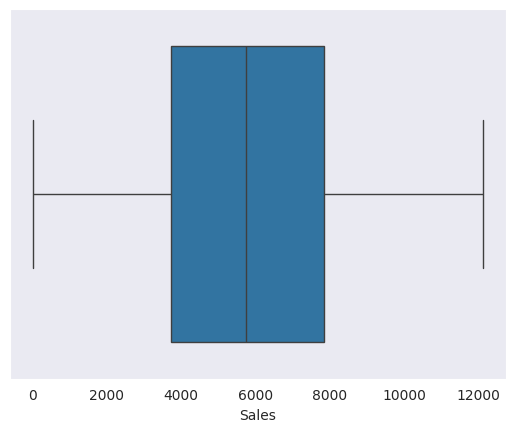

In [ ]:
sns.boxplot(x='Sales', data=final_sales_df)
plt.show()

### Multicollinearity

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd
# import numpy as np

# Function to calculate VIF for each feature
def calc_vif(dataframe):
    # Keep only numeric columns
    X = dataframe.select_dtypes(include=[np.number])

    # Drop rows with missing or infinite values
    X = X.replace([np.inf, -np.inf], np.nan).dropna()

    # Calculating VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data

In [ ]:
features_df = final_sales_df.drop(columns=['Sales'], errors='ignore')
vif_scores = calc_vif(features_df)
print(vif_scores)

                      Feature           VIF
0                       Store  3.698820e+00
1                   DayOfWeek  4.104634e+00
2                   Customers  5.236586e+00
3                        Open  9.374439e+00
4                       Promo  1.917193e+00
5                StateHoliday  1.187974e+00
6               SchoolHoliday  1.330848e+00
7                   StoreType  1.940267e+00
8                  Assortment  2.045386e+00
9         CompetitionDistance  1.589466e+00
10  CompetitionOpenSinceMonth  3.849024e+00
11   CompetitionOpenSinceYear  2.993096e+00
12                     Promo2  1.575793e+06
13            Promo2SinceWeek  3.998358e+00
14            Promo2SinceYear  1.574756e+06


Based on the VIF scores you've shared, we can draw insights about the multicollinearity in the features. Here’s a breakdown of what each VIF score tells us:

1. **General Threshold for VIF**:
   - VIF values between **1 and 5** suggest moderate multicollinearity but are generally acceptable.
   - VIF values **above 10** indicate high multicollinearity, which may require action, such as feature removal.

2. **Key Observations**:

   - **Promo2 and Promo2SinceYear** have extremely high VIF scores (around \(1.57 \times 10^6\)), indicating **very strong multicollinearity**. This suggests that these features are almost perfect linear combinations of other features. In machine learning, these kinds of features can cause instability in model coefficients and lead to overfitting.
   - **Customers, Open, and DayOfWeek** have moderately high VIF scores (above 5 but below 10), which indicates **some multicollinearity**. You could keep these features in the model but should be cautious if adding more related features.
   - **SchoolHoliday, StateHoliday, Assortment, and StoreType** have low VIF scores, suggesting minimal multicollinearity. These features are likely independent of each other and don’t introduce redundancy to the model.

3. **Recommended Actions**:
   - **Consider Removing or Transforming Promo2 and Promo2SinceYear**: The extremely high VIF values suggest they may not add much unique information and could distort the model. You might consider removing one or both of these features or checking for redundancy among these and other promotional variables.
   - **Analyze Customers, Open, and DayOfWeek for Redundancy**: You could try dropping one of these moderately high VIF features or performing dimensionality reduction techniques (like PCA) to handle potential multicollinearity.
   - **Retain Low VIF Features**: SchoolHoliday, StateHoliday, Assortment, and StoreType are not collinear and can be kept as-is.

By reducing or transforming the highly collinear features, you should be able to improve model stability and potentially enhance predictive performance.

In [ ]:
# Here we drop Promo2 column
calc_vif(final_sales_df[[i for i in final_sales_df.describe().columns if i not in ['Sales','Promo2']]])

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Feature,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


### **VIF factor below 10 is look good for Machine Learning Model.**

# **Analysis of Target Variable i.e 'Sales'.**

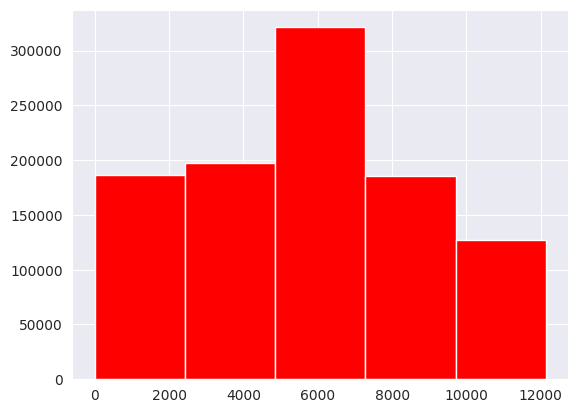

In [ ]:
pd.Series(final_sales_df['Sales'],).hist(bins=5, color="red")
plt.show()

In [ ]:
final_sales_df[(final_sales_df.Open == 0) & (final_sales_df.Sales == 0)].count()[0]

<ipython-input-60-de12c64df764>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_sales_df[(final_sales_df.Open == 0) & (final_sales_df.Sales == 0)].count()[0]


172817

**So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately.**

In [ ]:
df1 = final_sales_df.drop(final_sales_df[(final_sales_df.Open == 0) & (final_sales_df.Sales == 0)].index)

In [ ]:
df1.shape

(844392, 18)

In [ ]:
df1.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"


### 3. Categorical Encoding

In [ ]:
# Now apply get_dummies for any additional categorical encoding needed
df1 = pd.get_dummies(df1, columns=['PromoInterval'])



In [ ]:
# Convert True/False to 1/0
df1[['PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']] = df1[['PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']].astype(int)

In [ ]:
df1.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0


In [ ]:
# final missing value check
df1.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
final_sales_df.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
final_sales_df.shape

(1017209, 18)

In [ ]:
df1.shape

(844392, 21)

In [ ]:
df1.to_csv('cleandata.csv', index=False)

In [ ]:
final_sales_df.to_csv('cleandata1.csv', index=False)

In [ ]:
df1.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0


## ***7. ML Model Implementation***

# **MODEL TRAINING**

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **MODEL 1 (excluding rows which has sales =0)**


As we have two dataset,first one having sales = '0' rows and another exculding it. We will both the data and find the best model.

**First We will take dataset excluding Sales = '0' rows.**

In [ ]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(df1.columns.drop(['Promo2SinceYear','Date','Sales']))

In [ ]:
#List of Independent Variable
independent_variables


['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [ ]:
# Create the data of independent variables
X = df1[independent_variables].values

# Create the data of dependent variable
Y = df1[dependent_variables].values

In [ ]:
# splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


In [ ]:
# Here we Train the model
reg = LinearRegression().fit(X_train, Y_train)

In [ ]:
#Checking the Regression Score i.e R-squared value
reg.score(X_train, Y_train)*100

67.87447358184974

In [ ]:
# Checking the cofficient of different independent columns
reg.coef_

array([-1.37998253e-01, -6.14562061e+01,  4.69657368e+00, -6.94644342e-12,
        1.34290272e+03, -1.32996494e+03,  4.60940488e+01,  2.35307413e+02,
        2.02149507e+02,  2.29497174e-02,  2.60879803e+01,  7.02611151e-02,
       -8.48793310e+01,  1.25562110e+01,  8.48793310e+01,  1.97390972e+01,
        1.27406951e+02, -2.32025380e+02])

In [ ]:
# Checking the intercept of different indpendent columns
reg.intercept_

1867.9457678579283

In [ ]:
#Predicting Dependent Variable With Test Dataset i.e 20%
Y_pred = reg.predict(X_test)
Y_pred

array([5496.09123113, 5021.17924065, 6911.05495148, ..., 4416.00063128,
       7611.8202915 , 5379.74915458])

In [ ]:
#Predicting on Train Dataset
Y_pred_train = reg.predict(X_train)
Y_pred_train


array([5465.4064586 , 6939.25155237, 6365.79550788, ..., 7214.91471022,
       6775.30548277, 6177.68472689])

In [ ]:
# Dependent Variable With Train Dataset i.e 80 %
Y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [ ]:
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(Y_test, Y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2075426.5213980142
RMSE : 1440.6340692202216


In [ ]:
r2 = r2_score(Y_test, Y_pred)
print("R2 :" ,r2)

R2 : 0.6818849268435103


In [ ]:
pd.DataFrame(zip(Y_test, Y_pred), columns = ['actual', 'pred'])

,actual,pred
0,5495,5496.091231
1,5472,5021.179241
2,7969,6911.054951
3,7384,6056.870360
4,12137,7327.702242
...,...,...
168874,12137,13962.256829
168875,9195,6668.721775
168876,2938,4416.000631
168877,10413,7611.820291


In [ ]:
pip install shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0a2d521d87f7ece5a4ee5a8267aeeba485cba39291c6661f2d7be494125a08de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **SHAP and LIME**

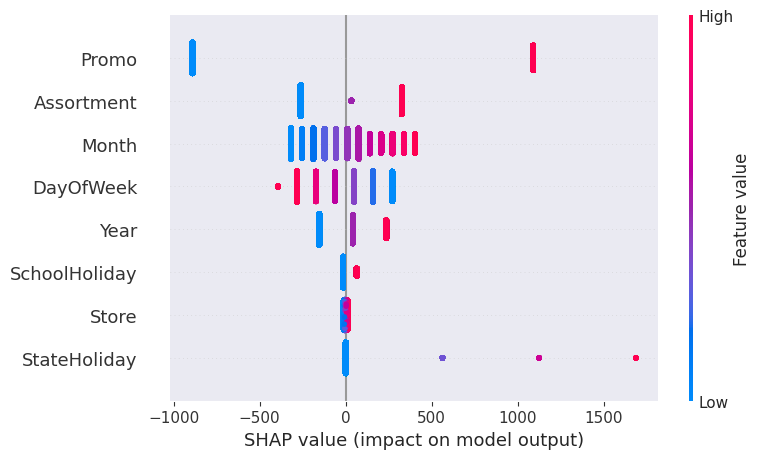

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[('2013.00 < Year <= 2014.00', 239774.09378000334), ('SchoolHoliday <= 0.00', -12212.955360067223), ('DayOfWeek > 4.00', -10014.10541829528), ('6.00 < Month <= 8.00', -5224.052982390091)]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

# Load the Rossman dataset
data = pd.read_csv("/content/cleandata.csv", low_memory=False)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day of week from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Select relevant features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Assortment']

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(data[features], data['Sales'], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, Y_train)

# Create a SHAP explainer object using a masker
masker = shap.maskers.Independent(X_train)
explainer = shap.LinearExplainer(model, masker=masker)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the test set
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# Explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# Print the LIME explanation
print(exp.as_list())


**#SHAP:- SHapley Additive exPlanations**

**#LIME:- Local Interpretable Model-Agnostic Explanations**




**SHAP values are a way of explaining the output of a machine learning model by calculating the contribution of each feature to the predicted output.**

**LIME is another technique for explaining the output of a machine learning model by approximating the model's behavior locally around the instance**

# **LASSO**

In [ ]:
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001)

In [ ]:
L1.fit(X_train, Y_train)

Lasso(alpha=0.4, max_iter=10000)

In [ ]:
Y_pred_lasso = L1.predict(X_test)

In [ ]:
L1.score(X_test, Y_test)

0.19134647502002855

In [ ]:
cv_scores = cross_val_score(L1, X, Y, cv=10)
mean_cv_score = cv_scores.mean()

In [ ]:
cv_scores

array([0.64431546, 0.66821341, 0.65412535, 0.68751828, 0.67324247,
       0.69752869, 0.66424335, 0.68880007, 0.66175444, 0.69363028])

In [ ]:
mean_cv_score

0.6733371808297607

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(X, Y)



GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [ ]:
# extract the best alpha value and corresponding score
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso= lasso_cv.best_score_

In [ ]:
best_alpha_lasso

0.1

In [ ]:
best_score_lasso

0.6751100503000703

In [ ]:
pd.DataFrame(zip(Y_test, Y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5203,6076.461630
1,8590,7881.035110
2,6465,6571.337622
3,7250,6435.372171
4,4339,6235.848720
...,...,...
168874,10096,7712.200696
168875,12137,8042.202396
168876,7499,5630.380223
168877,11606,7376.352896


**Ridge**

In [ ]:
L2=Ridge(alpha=0.5)
L2.fit(X_train, Y_train)

Ridge(alpha=0.5)

In [ ]:
L2.predict(X_test)

array([6075.95184717, 7881.18139166, 6570.90097079, ..., 5629.56712969,
       7376.48753565, 6141.47900936])

In [ ]:
L2.score(X_test,Y_test)*100

19.137220469056093

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, Y)

# extract the best alpha value and corresponding score
best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=best_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, Y, cv=5)

# find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = best_alpha

print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)


Best alpha value:  0.5
Best score:  0.6751102865868732
Maximum CV score:  0.6883700172623545
Corresponding alpha value:  0.5


# **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# define the Elastic Net model
elastic_net = ElasticNet(max_iter=10000)

# define the range of alpha and l1_ratio values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# perform grid search to find the best alpha and l1_ratio values
elastic_net_cv = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv.fit(X_train, Y_train)

# extract the best alpha and l1_ratio values and corresponding score
best_alpha = elastic_net_cv.best_params_['alpha']
best_l1_ratio = elastic_net_cv.best_params_['l1_ratio']
best_score = elastic_net_cv.best_score_

# create an Elastic Net model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net_best.fit(X_train, Y_train)

# evaluate the model on the testing set
test_score = elastic_net_best.score(X_test, Y_test)

print("Best alpha value: ", best_alpha)
print("Best l1_ratio value: ", best_l1_ratio)
print("Best score: ", best_score)
print("Test score: ", test_score)


Best alpha value:  0.1
Best l1_ratio value:  0.9
Best score:  0.6781889978375414
Test score:  0.6814120250996745


# **Decision Tree**

In [ ]:
sales_mean=final_sales_df[dependent_variables].mean()

In [ ]:
sales_mean

5620.7458998101665

In [ ]:
sales_mean_new=df1[dependent_variables].mean()

In [ ]:
sales_mean_new

6771.112606467139

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, Y_train)
Y_pred_dt = decision_tree.predict(X_test)
Y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(Y_test, Y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean_new
print("RMPSE :",RMPSE)

r2 = r2_score(Y_test, Y_pred_dt)
print("R2 :" ,r2)

MSE : 1336306.2662718792
RMSE : 1155.9871393194126
RMPSE : 0.17072336652846695
R2 : 0.795175034494497


# **MODEL 2 (By taking whole Dataset)**


**In final1 dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).**

In [ ]:
# Now apply get_dummies for any additional categorical encoding needed
final_sales_df = pd.get_dummies(final_sales_df, columns=['PromoInterval'])

In [ ]:
# Convert True/False to 1/0
final_sales_df[['PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']] = final_sales_df[['PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']].astype(int)

In [ ]:
final_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,12137,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


**We define dependent and independent variables and convert them into arrays**

In [ ]:
# defining dependent variable
dep_var='Sales'

# defining independent variable
indep_var=final_sales_df.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [ ]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
# Create the data of independent variables
M=final_sales_df[indep_var].values
# Create the dependent variable data
N=final_sales_df[dep_var].values

In [ ]:
# splitting the dataset
M_train,M_test,N_train,N_test=train_test_split(M,N,test_size=0.2,random_state=0)

In [ ]:
print(M_train.shape)
print(M_test.shape)

(813767, 17)
(203442, 17)


# **LINEAR REGRESSION**

In [ ]:
# scaling the x values
scaler=StandardScaler()

M_train=scaler.fit_transform(M_train)
M_test=scaler.transform(M_test)

In [ ]:
# fitting the data into Linear Regression Model
linear_regression=LinearRegression()
linear_regression.fit(M_train,N_train)

LinearRegression()

In [ ]:
N_pred=linear_regression.predict(M_test)
N_pred

array([ 6672.40646305, 11182.6838068 ,  8339.8166193 , ...,
        6633.53927555,  5857.86740055,  4510.0119318 ])

In [ ]:
linear_regression.score(M_train,N_train)*100

84.87988636402757

In [ ]:
regression_Dataframe = pd.DataFrame(zip(N_test, N_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,6672.406463
1,6221,11182.683807
2,8132,8339.816619
3,12137,10548.711151
4,5472,6713.605682
...,...,...
203437,5650,6752.082244
203438,5464,6710.039276
203439,6191,6633.539276
203440,5663,5857.867401


In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(N_test, N_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(N_test, N_pred)
print("R2 :" ,r2)

MSE : 1779625.0628992226
RMSE : 1334.0258853932417
RMPSE : 0.23733965369939541
R2 : 0.8499919188581364


# **DECISION TREE**

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(M_train, N_train)
v_pred_dt = decision_tree.predict(M_test)
v_train_dt = decision_tree.predict(M_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(N_test, N_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(N_test, N_pred)
print("R2 :" ,r2)

MSE : 1779625.0628992226
RMSE : 1334.0258853932417
RMPSE : 0.23733965369939541
R2 : 0.8499919188581364


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(N_test, N_pred), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,7285,6672.406463
1,6221,11182.683807
2,8132,8339.816619
3,12137,10548.711151
4,5472,6713.605682
...,...,...
203437,5650,6752.082244
203438,5464,6710.039276
203439,6191,6633.539276
203440,5663,5857.867401


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with optimized parameters
random_forest = RandomForestRegressor(n_estimators=100, max_depth=8, n_jobs=-1)

# Fit the random forest to the training data
random_forest.fit(M_train, N_train)

# Make predictions on the test data
N_pred_rf = random_forest.predict(M_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(N_test, N_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(N_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(N_test, N_pred_rf)
print("R2:", r2)


MSE: 818561.0751594455
RMSE: 904.7436516270482
RMPSE: 0.16081269997093844
R2: 0.9310018841934894


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create an AdaBoost regressor with optimized parameters
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.05, random_state=42)

# Fit the AdaBoost model to the training data
adaboost.fit(M_train, N_train)

# Make predictions on the test data
N_pred_ada = adaboost.predict(M_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(N_test, N_pred_ada)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the mean of the actual test values for RMPSE calculation
sales_mean = np.mean(N_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(N_test, N_pred_ada)
print("R2:", r2)


MSE: 1394784.1815797477
RMSE: 1181.0098143452271
RMPSE: 0.20991733580610056
R2: 0.8824309102812119


In [ ]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(M_train, N_train)
N_pred_xgb = xgboost.predict(M_test)

MSE = mean_squared_error(N_test, N_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(N_test, N_pred_xgb)
print("R2 :", r2*100)

MSE : 125253.26618939913
RMSE : 353.91138183081813
RMPSE : 0.0629056028857557
R2 : 98.94421696662903


In [ ]:
final_sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,12137,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,...,1900,1,2014,1,31,2013,0,0,1,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,...,1880,1,2006,0,0,0,1,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,...,9260,1,0,0,0,0,1,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,...,870,1,0,0,0,0,1,0,0,0


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
pickle.dump(final_sales_df,open('final_sales_df.pkl','wb'))
pickle.dump(xgboost,open('xgboost.pkl','wb'))

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We saw that Sales column contains 172817 rows with 0 sale. So we created a   new dataframe in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around **79%.**



We were also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about **99%** which is far better than previous model.




So we came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has **172817**   rows which is quite large and therefore we decided not to remove those values.We got our best rmpse score from **Random Forest model,Graident boosting technique like  adaboost ,Xgboost**,we tried taking an optimum parameter so that our model doesnt overfit.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***